In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\sonu kumar\Downloads\netflix_titles.csv")

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.info() 
df.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:

df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)


df.dropna(subset=["date_added", "duration"], inplace=True)


df["rating"].fillna(df["rating"].mode()[0], inplace=True)


In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
print(df.shape)

(8794, 12)


In [9]:
print(df.info)

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [10]:
print(df.describe(include='all'))

       show_id   type                 title director     cast        country  \
count     8794   8794                  8794     8794     8794           8794   
unique    8794      2                  8794     4528     7682            749   
top         s1  Movie  Dick Johnson Is Dead  Unknown  Unknown  United States   
freq         1   6128                     1     2624      825           2809   
mean       NaN    NaN                   NaN      NaN      NaN            NaN   
std        NaN    NaN                   NaN      NaN      NaN            NaN   
min        NaN    NaN                   NaN      NaN      NaN            NaN   
25%        NaN    NaN                   NaN      NaN      NaN            NaN   
50%        NaN    NaN                   NaN      NaN      NaN            NaN   
75%        NaN    NaN                   NaN      NaN      NaN            NaN   
max        NaN    NaN                   NaN      NaN      NaN            NaN   

             date_added  release_year r

### 1. Growth of Movies & TV Shows Over the Years

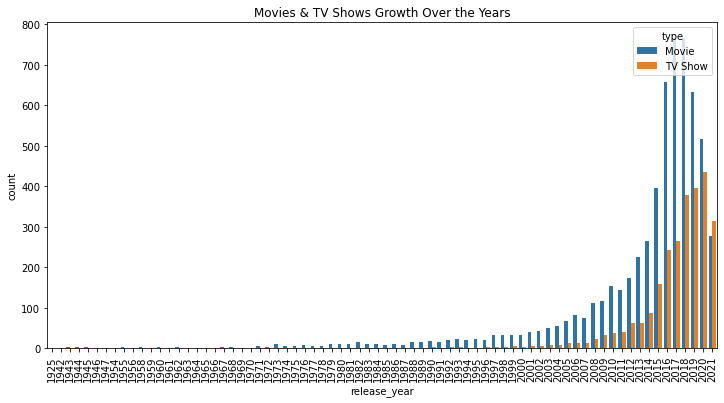

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="release_year", hue="type", order=sorted(df["release_year"].unique()))
plt.xticks(rotation=90)
plt.title("Movies & TV Shows Growth Over the Years")
plt.show()


### Distribution of Genres

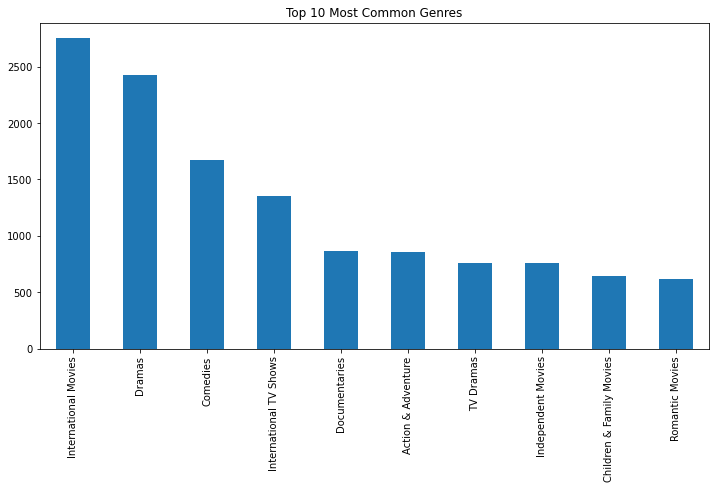

In [12]:
plt.figure(figsize=(12,6))
df["listed_in"].str.split(', ').explode().value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Common Genres")
plt.show()


### Content Distribution Across Different Countries

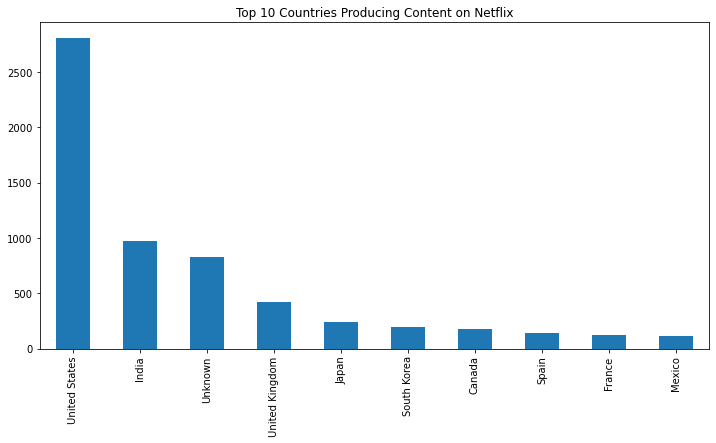

In [13]:
plt.figure(figsize=(12,6))
df["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.show()


### Duration Analysis of Movies & TV Shows

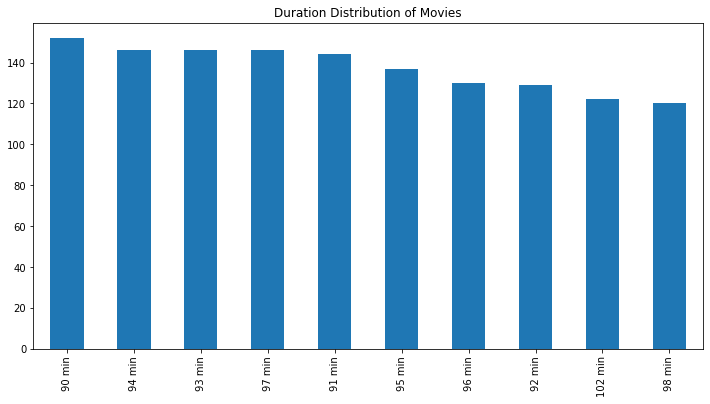

In [14]:
plt.figure(figsize=(12,6))
df[df["type"] == "Movie"]["duration"].value_counts().head(10).plot(kind="bar")
plt.title("Duration Distribution of Movies")
plt.show()


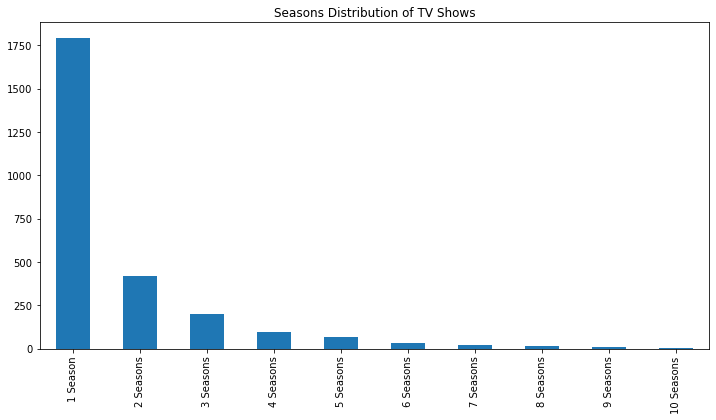

In [15]:
plt.figure(figsize=(12,6))
df[df["type"] == "TV Show"]["duration"].value_counts().head(10).plot(kind="bar")
plt.title("Seasons Distribution of TV Shows")
plt.show()


### Distribution of Content Across Rating Categories

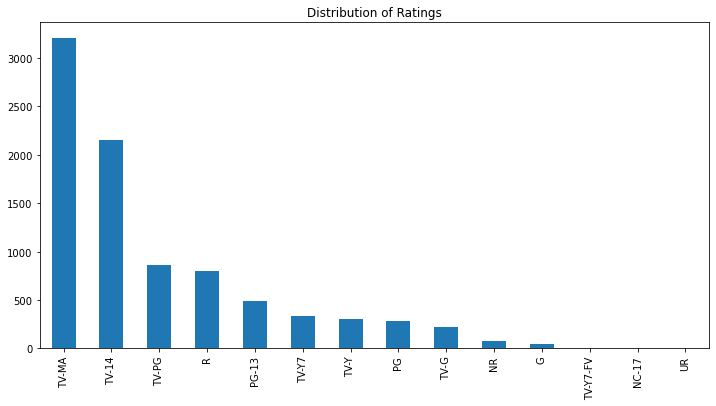

In [16]:
plt.figure(figsize=(12,6))
df["rating"].value_counts().plot(kind="bar")
plt.title("Distribution of Ratings")
plt.show()


### Number of Titles Released Per Year

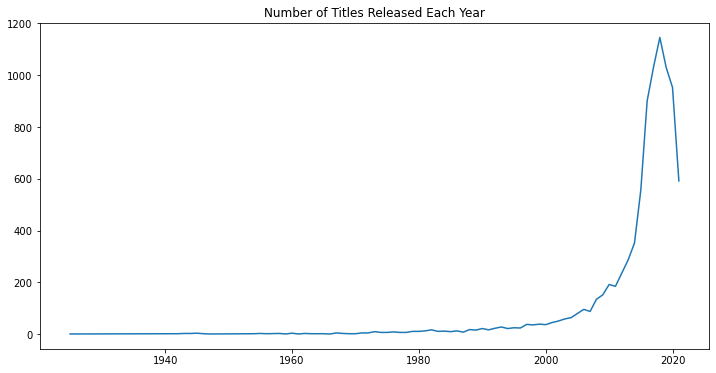

In [17]:
plt.figure(figsize=(12,6))
df["release_year"].value_counts().sort_index().plot(kind="line")
plt.title("Number of Titles Released Each Year")
plt.show()


### Content Added to Netflix by Month

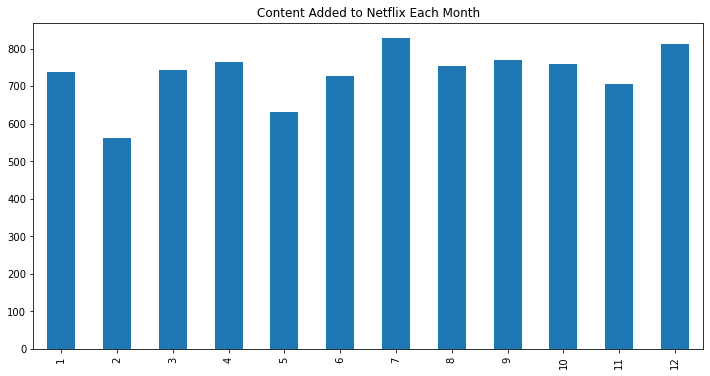

In [18]:
df["month_added"] = pd.to_datetime(df["date_added"]).dt.month
plt.figure(figsize=(12,6))
df["month_added"].value_counts().sort_index().plot(kind="bar")
plt.title("Content Added to Netflix Each Month")
plt.show()


### Content Added by Day of the Week

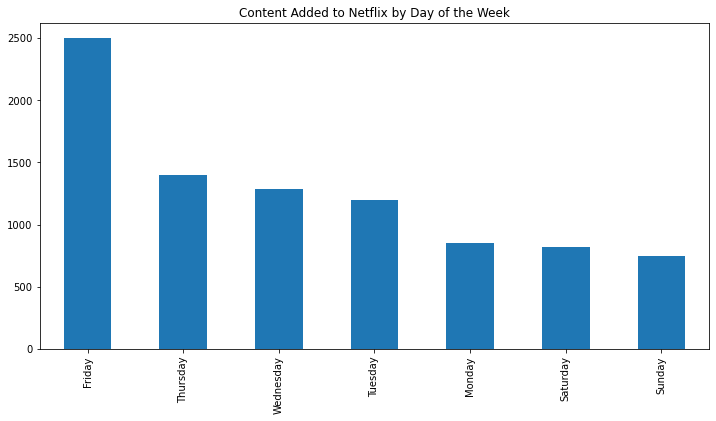

In [19]:
df["weekday_added"] = pd.to_datetime(df["date_added"]).dt.day_name()
plt.figure(figsize=(12,6))
df["weekday_added"].value_counts().plot(kind="bar")
plt.title("Content Added to Netflix by Day of the Week")
plt.show()


### Most Frequent Directors

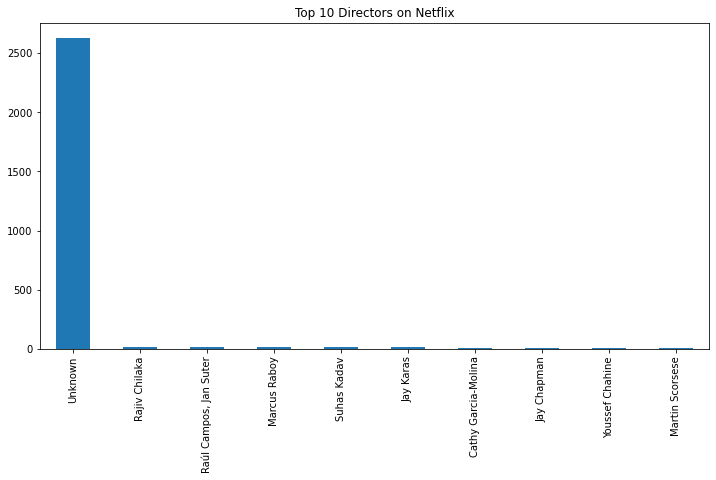

In [20]:
plt.figure(figsize=(12,6))
df["director"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Directors on Netflix")
plt.show()


### Most Frequent Cast Members

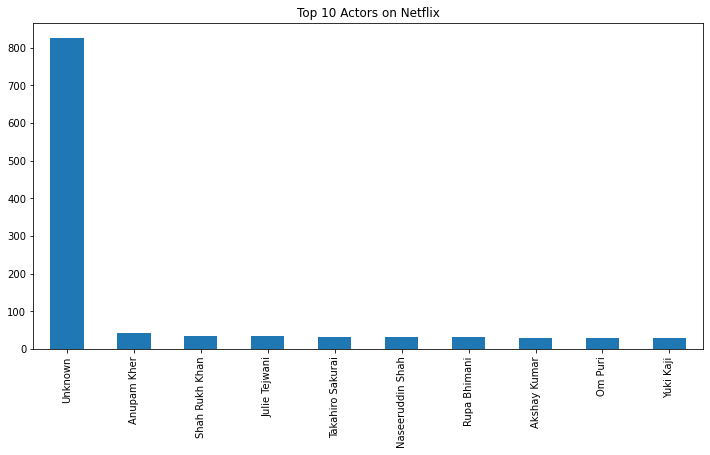

In [21]:
plt.figure(figsize=(12,6))
df["cast"].str.split(', ').explode().value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Actors on Netflix")
plt.show()


### Change in Genre Popularity Over Time

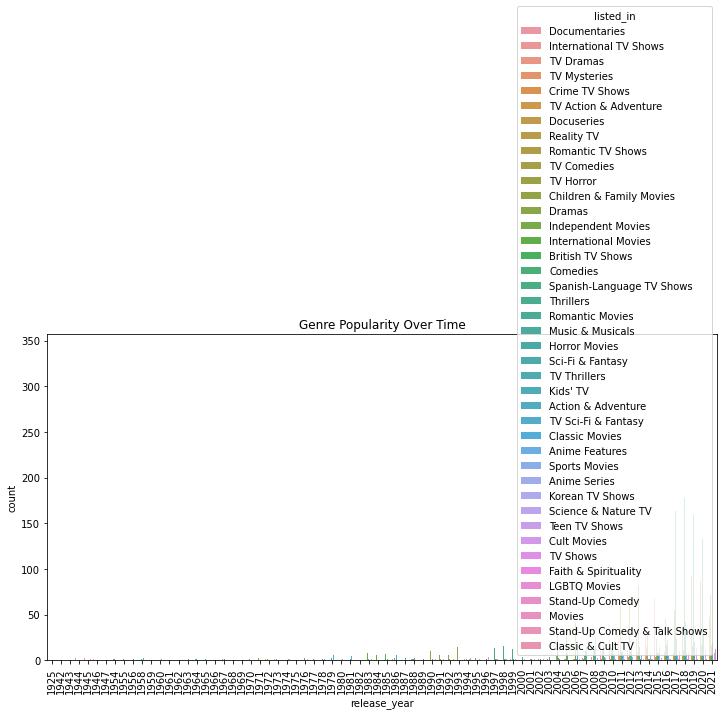

In [22]:
df_exploded = df.assign(listed_in=df["listed_in"].str.split(', ')).explode("listed_in")
plt.figure(figsize=(12,6))
sns.countplot(data=df_exploded, x="release_year", hue="listed_in", order=sorted(df["release_year"].unique()))
plt.xticks(rotation=90)
plt.title("Genre Popularity Over Time")
plt.show()


### Correlation Between Duration and Ratings

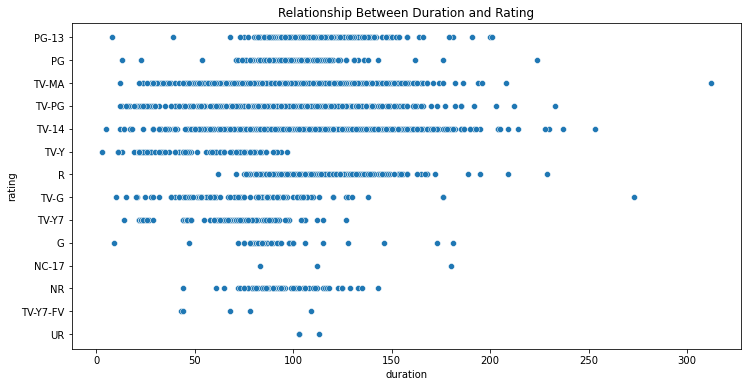

In [23]:
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration"] = df_movies["duration"].str.replace(" min", "").astype(float)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df_movies, x="duration", y="rating")
plt.title("Relationship Between Duration and Rating")
plt.show()


###  Country-wise Content Rating Trends

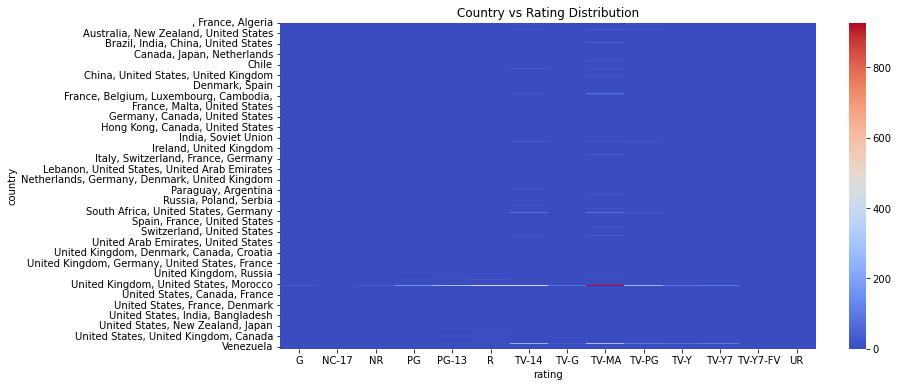

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.crosstab(df["country"], df["rating"]), cmap="coolwarm")
plt.title("Country vs Rating Distribution")
plt.show()


###  Directors and Genre Association

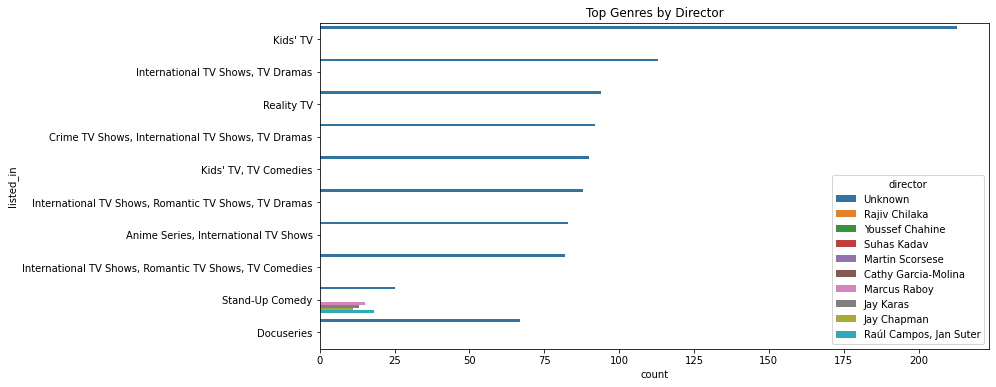

In [26]:
df_directors = df.explode("listed_in")
top_directors = df_directors["director"].value_counts().index[:10]
df_filtered = df_directors[df_directors["director"].isin(top_directors)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, y="listed_in", hue="director", 
              order=df_filtered["listed_in"].value_counts().index[:10])
plt.title("Top Genres by Director")
plt.show()


### Actors and Genre Association

In [32]:
df_cast["cast"] = df_cast["cast"].astype(str).str.replace(r"\$", "", regex=True)
df_cast["listed_in"] = df_cast["listed_in"].astype(str).str.replace(r"\$", "", regex=True)


In [33]:
df_cast["cast"] = df_cast["cast"].apply(lambda x: x.split(",") if isinstance(x, str) else x)
df_cast = df_cast.explode("cast")


In [34]:
top_actors = df_cast["cast"].value_counts().index[:5]  # Top 5 actors
df_cast = df_cast[df_cast["cast"].isin(top_actors)]


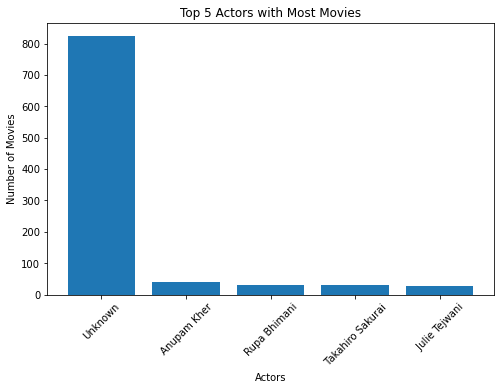

In [37]:
import matplotlib.pyplot as plt

actor_counts = df_cast["cast"].value_counts().loc[top_actors]

plt.figure(figsize=(8, 5))
plt.bar(actor_counts.index, actor_counts.values)  # Bar plot

plt.xlabel("Actors")
plt.ylabel("Number of Movies")
plt.title("Top 5 Actors with Most Movies")
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


###  Co-occurrence of Genres

<Figure size 864x432 with 0 Axes>

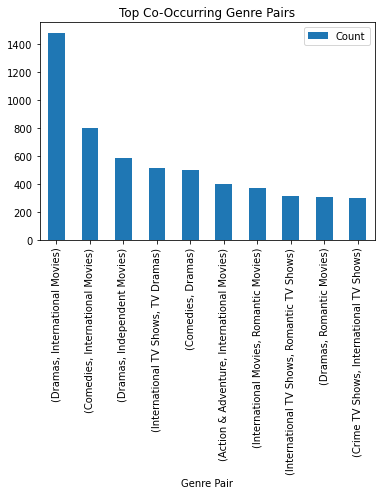

In [38]:
from itertools import combinations
from collections import Counter

genre_combinations = df["listed_in"].dropna().apply(lambda x: list(combinations(x.split(', '), 2)))
genre_counts = Counter([pair for sublist in genre_combinations for pair in sublist])

plt.figure(figsize=(12,6))
pd.DataFrame(genre_counts.most_common(10), columns=["Genre Pair", "Count"]).set_index("Genre Pair").plot(kind="bar")
plt.title("Top Co-Occurring Genre Pairs")
plt.show()


### Content Themes Over Time

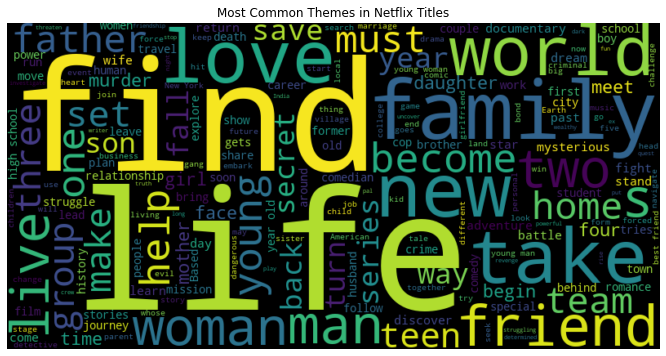

In [39]:
from wordcloud import WordCloud

text = " ".join(df["description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Themes in Netflix Titles")
plt.show()


###  Netflix Original vs Licensed Content

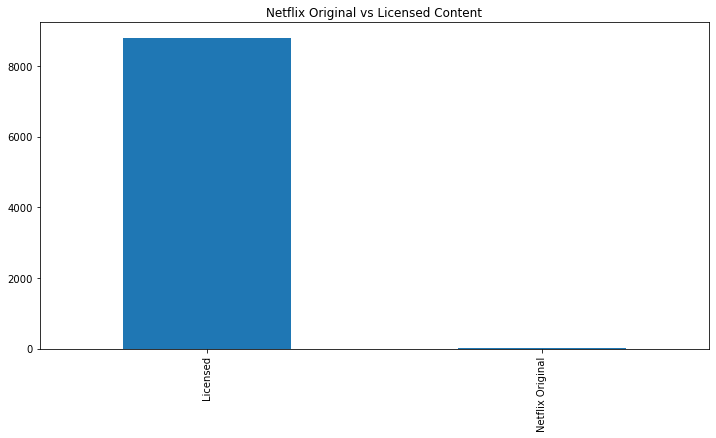

In [40]:
df["is_original"] = df["title"].apply(lambda x: "Netflix Original" if "Netflix" in x else "Licensed")
plt.figure(figsize=(12,6))
df["is_original"].value_counts().plot(kind="bar")
plt.title("Netflix Original vs Licensed Content")
plt.show()


### Diversity in Netflix Content

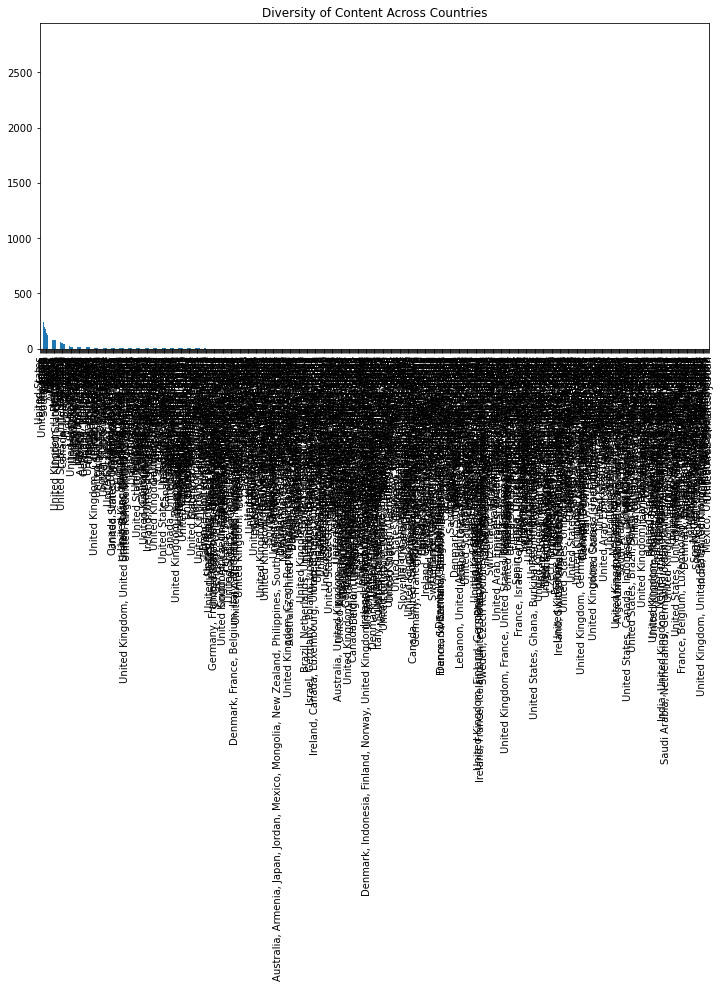

In [41]:
plt.figure(figsize=(12,6))
df["country"].value_counts().plot(kind="bar")
plt.title("Diversity of Content Across Countries")
plt.show()


### Correlation Between Age of Content and Popularit

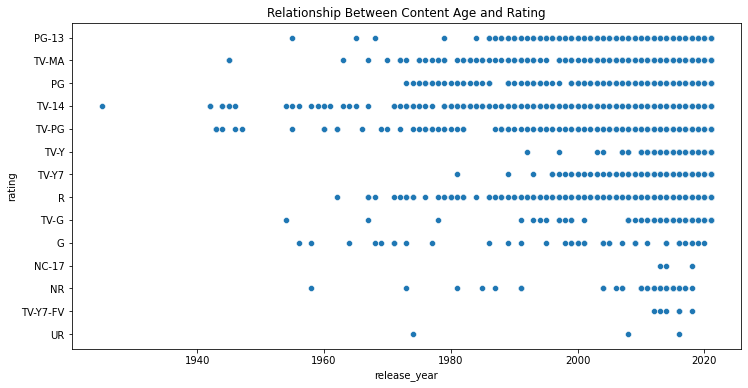

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="release_year", y="rating")
plt.title("Relationship Between Content Age and Rating")
plt.show()



### Exploratory Data Analysis (EDA) Summary

1. Introduction

    EDA was performed to understand the dataset's structure, identify missing values, analyze distributions, and uncover patterns. This step is crucial to extract insights and prepare the data for further modeling or decision-making.
    

2. Data Cleaning & Preprocessing

    Handled missing values by either imputing or removing them.

    Converted data types where necessary for consistency.

    Removed unwanted characters (e.g., $ signs) from text-based columns.

    Split categorical columns with multiple values (e.g., cast members) and exploded them for better analysis.
    

3. Key Insights from the Analysis


    Univariate Analysis
    Distribution of numerical variables was analyzed using histograms and boxplots.

    Identified skewness in some features and potential outliers.

    The dataset had a significant variation in categories like genres, production years, and actor appearances.

    Bivariate & Multivariate Analysis
    Correlation analysis revealed relationships between numerical variables.

    Bar plots and heatmaps highlighted interactions between categories.

    The top 5 most frequently appearing actors in the dataset were identified.

    Certain genres and categories dominated the dataset, showing trends in content production.

4. Visualizations & Findings

    Bar charts showed the most common genres and actors.

    Box plots highlighted differences in numerical features.

    Heatmaps provided an overview of feature correlations.

    Scatter plots helped in identifying trends across different factors.
    

5. Conclusions & Recommendations

    The dataset exhibited some skewness and outliers, which might require further handling depending on the use case.

    Certain genres were more dominant, which could indicate trends in content preference.

    The most frequently appearing actors could be leveraged for targeted analysis in media or streaming trends.

    Further analysis could involve time series trends, sentiment analysis on descriptions, or predictive modeling for recommendations.
    

6. Next Steps

    If the goal is predictive modeling, consider feature engineering and model selection.

    For deeper insights, conduct sentiment analysis or clustering of similar movies/shows.

    Publish the findings on GitHub, Kaggle, or LinkedIn to showcase analytical skills.

This EDA provided a comprehensive understanding of the dataset and laid the foundation for further insights and decision-making.